In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-modeling/Churn_Modelling.csv


In [40]:
import nbconvert
import numpy as np # linear algebra
import pandas as pd # data processing with dataframes
import seaborn as sns #plotting
import matplotlib.pyplot as plt #plotting

df= pd.read_csv("../input/bank-customer-churn-modeling/Churn_Modelling.csv")

In [41]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [42]:
df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [43]:
print(df['Gender'].unique())
print(df['Geography'].unique())

['Female' 'Male']
['France' 'Spain' 'Germany']


0    7963
1    2037
Name: Exited, dtype: int64
Percentage of values in the positive class = 20.37


<AxesSubplot:xlabel='Exited', ylabel='count'>

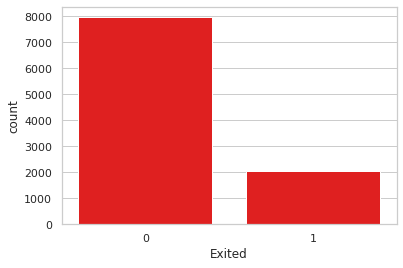

In [44]:
print(df['Exited'].value_counts())
class_1=len(df[df['Exited']==1])/len(df['Exited'])*100
print('Percentage of values in the positive class = {:.2f}'.format(class_1))
sns.countplot(x=df['Exited'],color='red')

In [45]:
data= df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1).copy()
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [46]:
df_gender=data.groupby(['Gender']).size().reset_index(name='Count')
#print(df_gender['Counts'])
df_gender['Proportion']= df_gender.apply(lambda x: x['Count']/np.sum(df_gender['Count']), axis=1)
print(df_gender)

df_gender_exited=data.groupby(['Gender'])['Exited'].sum().reset_index(name='Sum')
df_gender_exited['Proportion']= df_gender_exited.apply(lambda x: x['Sum']/np.sum(df_gender_exited['Sum']),\
                                                       axis=1)
print(df_gender_exited)

   Gender  Count  Proportion
0  Female   4543      0.4543
1    Male   5457      0.5457
   Gender   Sum  Proportion
0  Female  1139    0.559156
1    Male   898    0.440844


In [47]:
df_geo=data.groupby(['Geography']).size().reset_index(name='Count')
#print(df_gender['Counts'])
df_geo['Proportion']= df_geo.apply(lambda x: x['Count']/np.sum(df_geo['Count']), axis=1)
print(df_geo)

df_geo_exited=data.groupby(['Geography'])['Exited'].sum().reset_index(name='Sum')
df_geo_exited['Proportion_exit']= df_geo_exited.apply(lambda x: x['Sum']/np.sum(df_geo_exited['Sum']),\
                                                       axis=1)
print(df_geo_exited)

  Geography  Count  Proportion
0    France   5014      0.5014
1   Germany   2509      0.2509
2     Spain   2477      0.2477
  Geography  Sum  Proportion_exit
0    France  810         0.397644
1   Germany  814         0.399607
2     Spain  413         0.202749


<Figure size 432x288 with 0 Axes>

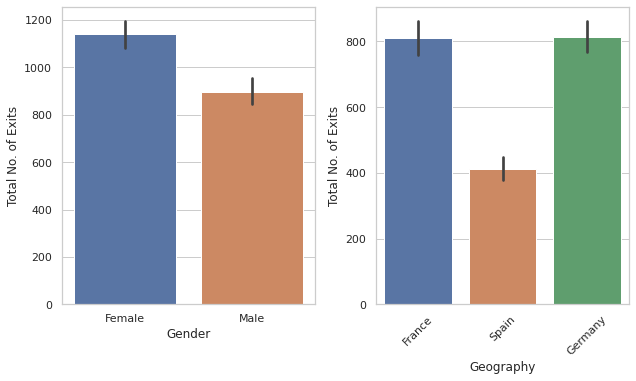

In [48]:
#Using seaborn to draw 4 barplots for 4 different categorical variab;es
sns.set_theme(style='whitegrid')

fig = plt.figure()

fig, axes = plt.subplots(1,2,figsize=(9, 5))

ax1=sns.barplot(data = data, x='Gender', y='Exited',estimator=sum, ax=axes[0])
ax1.set( ylabel='Total No. of Exits')

ax2=sns.barplot(data = data, x='Geography', y='Exited',estimator=sum, ax=axes[1])
ax2.set( ylabel='Total No. of Exits')

fig.tight_layout()

plt.xticks(rotation=45)
plt.show()

In [50]:
data_1=pd.get_dummies(data, columns=['Gender'],  drop_first=True,prefix='Gend_').copy()
encoded_data=pd.get_dummies(data_1, columns=['Geography'], drop_first=True, prefix='Geog_').copy()

encoded_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gend__Male,Geog__Germany,Geog__Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1
